# Spatial subsetting raster data

In [8]:
from helpers import src_elev
%matplotlib inline 
import matplotlib.pyplot as plt 
import rasterio.plot
import geopandas as gpd 
import numpy as np 
from shapely import Point

In [2]:
src_elev.sample([(0.1, 0.1)])

<generator object sample_gen at 0x7f9f42df3850>

>sample returns a generator. Can get all values with `list`

In [3]:
list(src_elev.sample([(0.1, 0.1)]))

[array([16], dtype=uint8)]

In [4]:
list(src_elev.sample([(0.1, 0.1), (1.1, 1.1)]))

[array([16], dtype=uint8), array([6], dtype=uint8)]

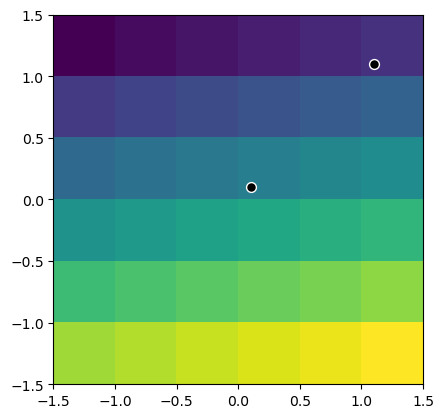

In [11]:
fig, ax = plt.subplots() 
rasterio.plot.show(src_elev, ax=ax)
gpd.GeoSeries([Point(0.1, 0.1)]).plot(color='k', 
                                     ec='w', 
                                     markersize=50, 
                                     ax=ax)
gpd.GeoSeries([Point(1.1, 1.1)]).plot(ax=ax, 
                                     color='k', 
                                     ec='w', 
                                     markersize=50);

>Create a boolean mask based on a raster

In [12]:
elev = src_elev.read(1)
elev

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30],
       [31, 32, 33, 34, 35, 36]], dtype=uint8)

In [13]:
np.random.seed(1)
mask = np.random.choice([True, False], src_elev.shape)
mask

array([[False, False,  True,  True, False, False],
       [False, False, False,  True,  True, False],
       [ True, False, False,  True,  True, False],
       [ True,  True,  True, False,  True,  True],
       [False,  True,  True,  True, False,  True],
       [ True,  True, False, False, False, False]])

In [14]:
masked_elev = elev.copy() 
masked_elev = masked_elev.astype('float64')
masked_elev[mask] = np.nan 
masked_elev

array([[ 1.,  2., nan, nan,  5.,  6.],
       [ 7.,  8.,  9., nan, nan, 12.],
       [nan, 14., 15., nan, nan, 18.],
       [nan, nan, nan, 22., nan, nan],
       [25., nan, nan, nan, 29., nan],
       [nan, nan, 33., 34., 35., 36.]])

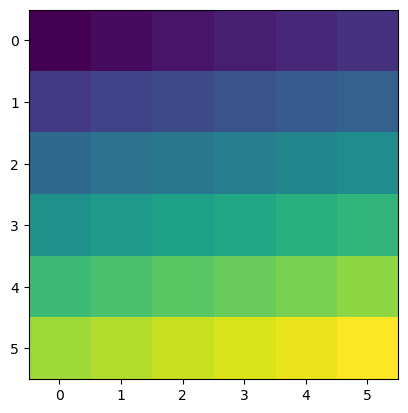

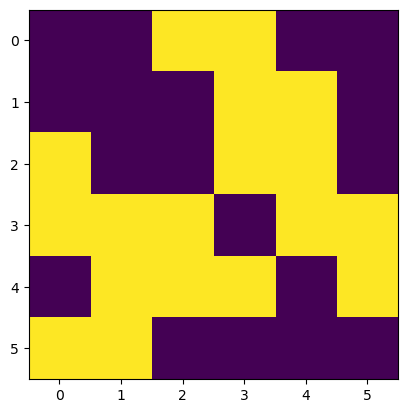

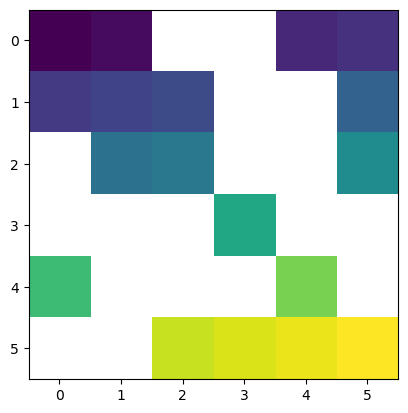

In [15]:
rasterio.plot.show(elev);
rasterio.plot.show(mask);
rasterio.plot.show(masked_elev);

>Or mask using conditions

In [16]:
elev2 = elev.copy()
elev2 = elev2.astype('float64')
elev2[elev2 < 20] = np.nan
elev2

array([[nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, 20., 21., 22., 23., 24.],
       [25., 26., 27., 28., 29., 30.],
       [31., 32., 33., 34., 35., 36.]])